# SQL KUNSKAPSKONTROLL

In [1]:
!pip install sqlalchemy
!pip install pyodbc

In [3]:
from sqlalchemy import create_engine, MetaData, Table, inspect
import pandas as pd

In [4]:
def new_engine(dialect, server, database, user=None, password=None, integrated_security=True):
    if integrated_security:
        # For Windows authentication
        eng = f"{dialect}://{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server"
    else:
        # For SQL Server authentication
        eng = f"{dialect}://{user}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"
    print(eng)
    return create_engine(eng)

In [5]:
# For Windows authentication
# Replace the server argument with the Server Name found when logging into SQL Server Management Studio 
# OR
# For SQL Server authentication
# Replace the server, user and password argument with the Server Name, username and password
engine = new_engine('mssql', 'LAPTOP-HT00GPQN', 'AdventureWorks2022', integrated_security=True)

mssql://LAPTOP-HT00GPQN/AdventureWorks2022?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server


In [6]:
print(type(engine))

<class 'sqlalchemy.engine.base.Engine'>


In [7]:
connection = engine.connect()

In [8]:
print(type(connection))

<class 'sqlalchemy.engine.base.Connection'>


In [9]:
inspector = inspect(engine)
schemas = inspector.get_schema_names()
print(schemas)

['db_accessadmin', 'db_backupoperator', 'db_datareader', 'db_datawriter', 'db_ddladmin', 'db_denydatareader', 'db_denydatawriter', 'db_owner', 'db_securityadmin', 'dbo', 'guest', 'HumanResources', 'INFORMATION_SCHEMA', 'Person', 'Production', 'Purchasing', 'Sales', 'sys']


In [10]:
for schema in schemas:
    print(schema)

db_accessadmin
db_backupoperator
db_datareader
db_datawriter
db_ddladmin
db_denydatareader
db_denydatawriter
db_owner
db_securityadmin
dbo
guest
HumanResources
INFORMATION_SCHEMA
Person
Production
Purchasing
Sales
sys


In [13]:
print(inspector.get_table_names(schema='Production'))

['BillOfMaterials', 'Culture', 'Document', 'Illustration', 'Location', 'Product', 'ProductCategory', 'ProductCostHistory', 'ProductDescription', 'ProductDocument', 'ProductInventory', 'ProductListPriceHistory', 'ProductModel', 'ProductModelIllustration', 'ProductModelProductDescriptionCulture', 'ProductPhoto', 'ProductProductPhoto', 'ProductReview', 'ProductSubcategory', 'ScrapReason', 'TransactionHistory', 'TransactionHistoryArchive', 'UnitMeasure', 'WorkOrder', 'WorkOrderRouting']


In [14]:
print(inspector.get_table_names(schema='Sales'))

['CountryRegionCurrency', 'CreditCard', 'Currency', 'CurrencyRate', 'Customer', 'PersonCreditCard', 'SalesOrderDetail', 'SalesOrderHeader', 'SalesOrderHeaderSalesReason', 'SalesPerson', 'SalesPersonQuotaHistory', 'SalesReason', 'SalesTaxRate', 'SalesTerritory', 'SalesTerritoryHistory', 'ShoppingCartItem', 'SpecialOffer', 'SpecialOfferProduct', 'Store']


In [15]:
for col in inspector.get_columns(table_name='Product', schema='Production'):
#     print(col)
    print(col['name'])

ProductID
Name
ProductNumber
MakeFlag
FinishedGoodsFlag
Color
SafetyStockLevel
ReorderPoint
StandardCost
ListPrice
Size
SizeUnitMeasureCode
WeightUnitMeasureCode
Weight
DaysToManufacture
ProductLine
Class
Style
ProductSubcategoryID
ProductModelID
SellStartDate
SellEndDate
DiscontinuedDate
rowguid
ModifiedDate


In [18]:
import matplotlib.pyplot as plt

In [19]:
#Defining and executing the SQL query to find the products with the most reviews per year
sql_query = """
SELECT 
    YEAR(ReviewDate) AS ReviewYear,
    ProductID,
    COUNT(*) AS NumberOfReviews
FROM 
    Production.ProductReview
GROUP BY 
    YEAR(ReviewDate), 
    ProductID
ORDER BY 
    ReviewYear, 
    NumberOfReviews DESC;
"""

# Execute the query and load into a Pandas DataFrame
df_reviews = pd.read_sql(sql_query, engine)

# Display the first few rows to verify
df_reviews.head()


,ReviewYear,ProductID,NumberOfReviews
0,2013,937,2
1,2013,709,1
2,2013,798,1


In [20]:
#Using Pandas to analyze the data
#the top reviewed product per year
top_reviews_per_year = df_reviews.groupby('ReviewYear').head(1).reset_index(drop=True)
top_reviews_per_year


,ReviewYear,ProductID,NumberOfReviews
0,2013,937,2


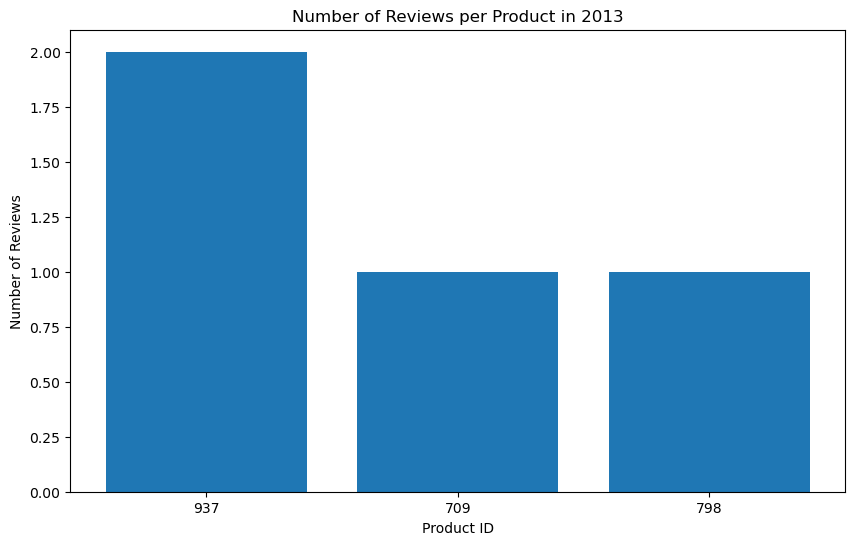

In [24]:
import matplotlib.pyplot as plt

# Assuming df is the DataFrame.
# df = pd.DataFrame({'ReviewYear': [2013, 2013, 2013],
#                    'ProductID': [937, 709, 798],
#                    'NumberOfReviews': [2, 1, 1]})

import pandas as pd

# Creating a DataFrame by specifying the data as a list of lists and the column names.
df = pd.DataFrame(data=[
    [2013, 937, 2],
    [2013, 709, 1],
    [2013, 798, 1]
], columns=['ReviewYear', 'ProductID', 'NumberOfReviews'])


# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['ProductID'].astype(str), df['NumberOfReviews'])  # Converting ProductID to string for plotting
plt.xlabel('Product ID')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Product in 2013')
plt.show()

In [25]:
# Executing SQL Query to retrieve the Products with the Highest Average Rating Per Year
sql_query = """
SELECT 
    YEAR(PR.ReviewDate) AS ReviewYear,
    PR.ProductID,
    AVG(PR.Rating) AS AverageRating
FROM 
    Production.ProductReview PR
GROUP BY 
    YEAR(PR.ReviewDate), 
    PR.ProductID
ORDER BY 
    ReviewYear, 
    AverageRating DESC;
"""

# Executing the query and loading into a Pandas DataFrame
df_ratings = pd.read_sql(sql_query, engine)

# Displaying the first few rows to verify
df_ratings.head()


,ReviewYear,ProductID,AverageRating
0,2013,709,5
1,2013,798,5
2,2013,937,3


In [26]:
# Analyzing Data Using Pandas to Find the Highest Average Rating Per Year
# Want the highest rated product per year
highest_rating_per_year = df_ratings.groupby('ReviewYear').head(1).reset_index(drop=True)
highest_rating_per_year


,ReviewYear,ProductID,AverageRating
0,2013,709,5


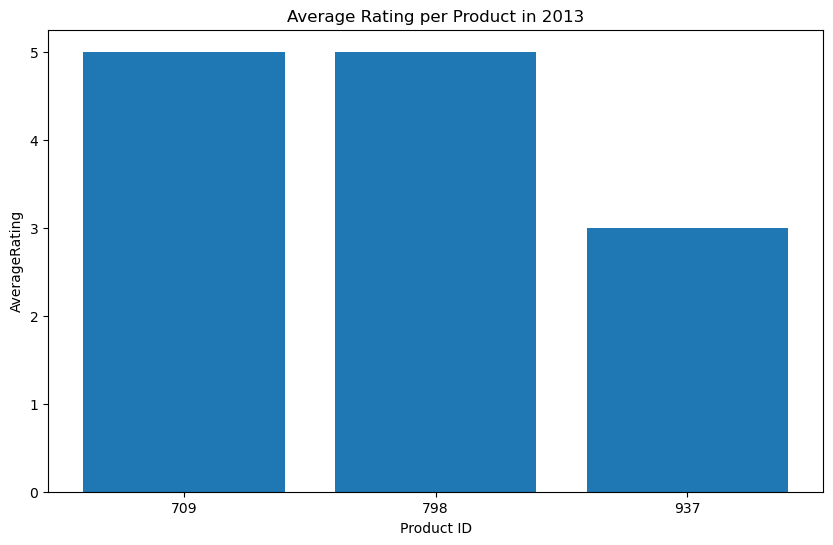

In [28]:
import matplotlib.pyplot as plt

# Assuming df is the DataFrame.
# df = pd.DataFrame({'ReviewYear': [2013, 2013, 2013],
#                    'ProductID': [937, 709, 798],
#                    'AverageRating': [5, 5, 3]})

import pandas as pd

# Creating a DataFrame by specifying the data as a list of lists and the column names.
df = pd.DataFrame(data=[
    [2013, 709, 5],
    [2013, 798, 5],
    [2013, 937, 3]
], columns=['ReviewYear', 'ProductID', 'AverageRating'])


# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['ProductID'].astype(str), df['AverageRating'])  # Converting ProductID to string for plotting
plt.xlabel('Product ID')
plt.ylabel('AverageRating')
plt.title('Average Rating per Product in 2013')
plt.show()

In [30]:
# Defining and Executing the SQL Query to Retrieve the Product Sales Data
sql_query = """
SELECT 
    YEAR(SOH.OrderDate) AS SalesYear,
    SOD.ProductID,
    P.Name AS ProductName,
    SUM(SOD.LineTotal) AS TotalSales
FROM 
    Sales.SalesOrderDetail SOD
JOIN 
    Sales.SalesOrderHeader SOH ON SOD.SalesOrderID = SOH.SalesOrderID
JOIN 
    Production.Product P ON SOD.ProductID = P.ProductID
GROUP BY 
    YEAR(SOH.OrderDate), 
    SOD.ProductID, 
    P.Name
ORDER BY 
    SalesYear, 
    TotalSales DESC;
"""

# Executing the query and load the results into a Pandas DataFrame
df_sales = pd.read_sql(sql_query, engine)

# Displaying the first few rows to check the data
df_sales.head()


,SalesYear,ProductID,ProductName,TotalSales
0,2011,753,"Road-150 Red, 56",1.018376e+06
1,2011,749,"Road-150 Red, 62",9.689955e+05
2,2011,777,"Mountain-100 Black, 44",8.001197e+05
3,2011,771,"Mountain-100 Silver, 38",7.690777e+05
4,2011,751,"Road-150 Red, 48",7.650341e+05


In [31]:
# Using Pandas to Determine the Highest Sales Per Year
# The top-selling product per year
top_sales_per_year = df_sales.groupby('SalesYear').head(1).reset_index(drop=True)
top_sales_per_year


,SalesYear,ProductID,ProductName,TotalSales
0,2011,753,"Road-150 Red, 56",1.018376e+06
1,2012,783,"Mountain-200 Black, 42",1.167803e+06
2,2013,782,"Mountain-200 Black, 38",2.212975e+06
3,2014,782,"Mountain-200 Black, 38",1.045215e+06


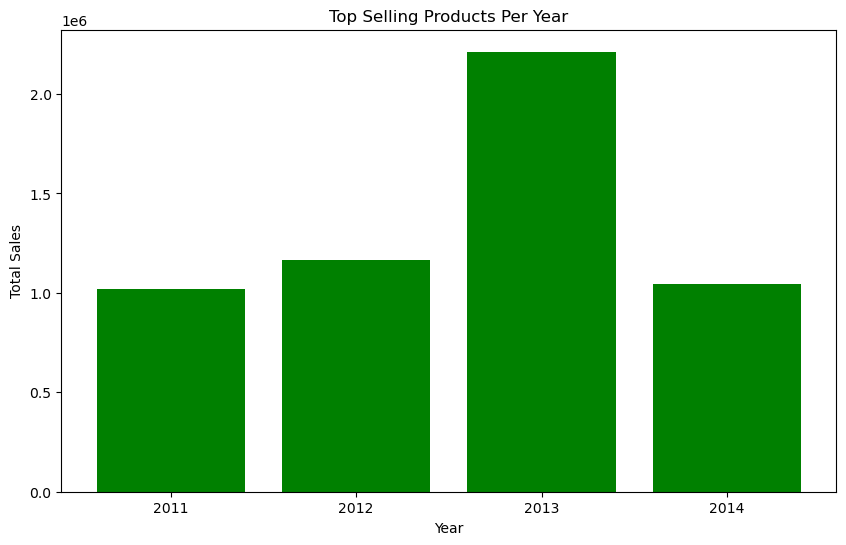

In [32]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.bar(top_sales_per_year['SalesYear'].astype(str), top_sales_per_year['TotalSales'], color='green')

# Set title and labels
ax.set_title('Top Selling Products Per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales')

# Show the plot
plt.show()


In [33]:
#Executing SQL Query to Retrieve the Sales and Category Data for Specific Products and Years
sql_query = """
SELECT 
    YEAR(SOH.OrderDate) AS SalesYear,
    SOD.ProductID,
    P.Name AS ProductName,
    PC.Name AS CategoryName,
    SUM(SOD.LineTotal) AS TotalSales
FROM 
    Sales.SalesOrderDetail SOD
JOIN 
    Sales.SalesOrderHeader SOH ON SOD.SalesOrderID = SOH.SalesOrderID
JOIN 
    Production.Product P ON SOD.ProductID = P.ProductID
LEFT JOIN 
    Production.ProductSubcategory PS ON P.ProductSubcategoryID = PS.ProductSubcategoryID
LEFT JOIN 
    Production.ProductCategory PC ON PS.ProductCategoryID = PC.ProductCategoryID
WHERE 
    SOD.ProductID IN (753, 783, 782)
    AND YEAR(SOH.OrderDate) IN (2011, 2012, 2013, 2014)
GROUP BY 
    YEAR(SOH.OrderDate), 
    SOD.ProductID, 
    P.Name, 
    PC.Name
ORDER BY 
    SalesYear, 
    TotalSales DESC;
"""

# Executing the query and loading the results into a Pandas DataFrame
df_sales_category = pd.read_sql(sql_query, engine)

# Displaying the first few rows to check the data
df_sales_category.head()


,SalesYear,ProductID,ProductName,CategoryName,TotalSales
0,2011,753,"Road-150 Red, 56",Bikes,1.018376e+06
1,2012,783,"Mountain-200 Black, 42",Bikes,1.167803e+06
2,2012,782,"Mountain-200 Black, 38",Bikes,1.142403e+06
3,2012,753,"Road-150 Red, 56",Bikes,8.294430e+05
4,2013,782,"Mountain-200 Black, 38",Bikes,2.212975e+06


In [34]:
# Filtering the Data to Get the Highest Sales Per Product Per Year
# Creating a filter for the DataFrame to only include the rows for the specific Product IDs and years
filtered_df = df_sales_category[
    (df_sales_category['ProductID'] == 753) & (df_sales_category['SalesYear'] == 2011) |
    (df_sales_category['ProductID'] == 783) & (df_sales_category['SalesYear'] == 2012) |
    (df_sales_category['ProductID'] == 782) & (df_sales_category['SalesYear'] == 2013) |
    (df_sales_category['ProductID'] == 782) & (df_sales_category['SalesYear'] == 2014)
]

# Want the highest sale product per specified year
highest_sales_per_product_per_year = filtered_df.groupby(['SalesYear', 'ProductID']).apply(lambda x: x.nlargest(1, 'TotalSales')).reset_index(drop=True)
highest_sales_per_product_per_year


,SalesYear,ProductID,ProductName,CategoryName,TotalSales
0,2011,753,"Road-150 Red, 56",Bikes,1.018376e+06
1,2012,783,"Mountain-200 Black, 42",Bikes,1.167803e+06
2,2013,782,"Mountain-200 Black, 38",Bikes,2.212975e+06
3,2014,782,"Mountain-200 Black, 38",Bikes,1.045215e+06


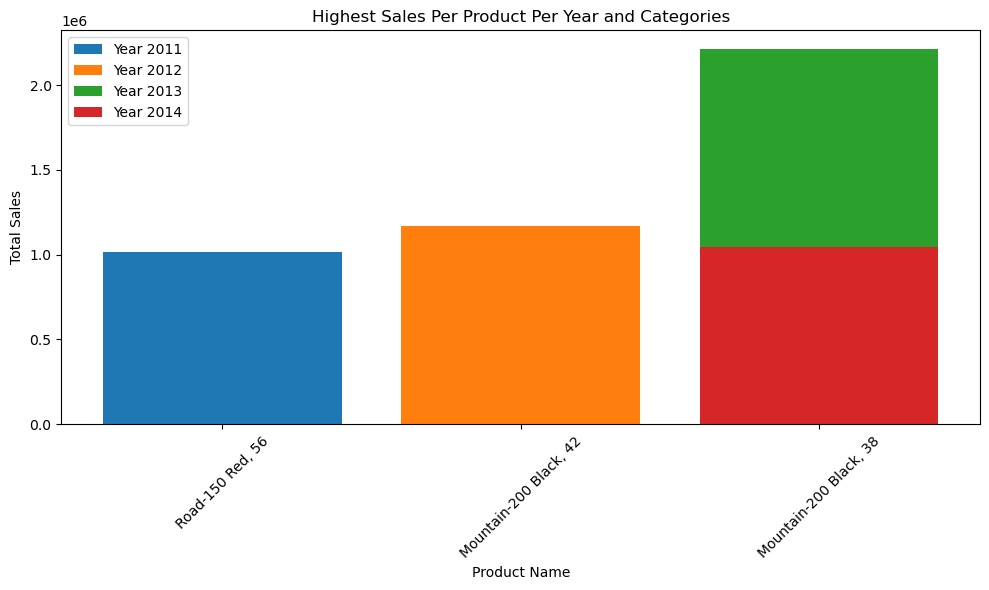

In [35]:
# Visualizing the Highest Sales Per Product Per Year and Their Categories 
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each unique year and plot the data
for year in highest_sales_per_product_per_year['SalesYear'].unique():
    year_data = highest_sales_per_product_per_year[highest_sales_per_product_per_year['SalesYear'] == year]
    ax.bar(year_data['ProductName'], year_data['TotalSales'], label=f'Year {year}')

# Set title and labels
ax.set_title('Highest Sales Per Product Per Year and Categories')
ax.set_xlabel('Product Name')
ax.set_ylabel('Total Sales')

# Add legend
ax.legend()

# Show the plot
plt.xticks(rotation=45)  # Rotate product names for better readability
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()


In [36]:
# Executing SQL Queries to Retrieve Discount and Sales Data
# Defining a SQL query to retrieve sales and discount data for the specified products and years
sql_query = """
SELECT 
    YEAR(SOH.OrderDate) AS SalesYear,
    SOD.ProductID,
    SOH.OrderDate,
    SO.DiscountPct,
    SOD.OrderQty,
    SOD.LineTotal,
    CASE WHEN SO.DiscountPct > 0 THEN 'Discounted' ELSE 'Not Discounted' END AS DiscountStatus
FROM 
    Sales.SalesOrderDetail SOD
JOIN 
    Sales.SalesOrderHeader SOH ON SOD.SalesOrderID = SOH.SalesOrderID
LEFT JOIN 
    Sales.SpecialOfferProduct SOP ON SOD.ProductID = SOP.ProductID
LEFT JOIN 
    Sales.SpecialOffer SO ON SOP.SpecialOfferID = SO.SpecialOfferID
WHERE 
    SOD.ProductID IN (753, 783, 782)
    AND YEAR(SOH.OrderDate) IN (2011, 2012, 2013, 2014)
ORDER BY 
    SOH.OrderDate;
"""

# Executing the query and loading the results into a Pandas DataFrame
df_discounts_sales = pd.read_sql(sql_query, engine)

# Displaying the first few rows to check the data
df_discounts_sales.head()


,SalesYear,ProductID,OrderDate,DiscountPct,OrderQty,LineTotal,DiscountStatus
0,2011,753,2011-05-31,0.0,1,2146.962,Not Discounted
1,2011,753,2011-05-31,0.0,1,2146.962,Not Discounted
2,2011,753,2011-05-31,0.0,2,4293.924,Not Discounted
3,2011,753,2011-05-31,0.0,1,2146.962,Not Discounted
4,2011,753,2011-05-31,0.0,1,2146.962,Not Discounted


In [37]:
# Analyzing the Data in Pandas
# Analyzing discounts and sales volume
discount_analysis = df_discounts_sales.groupby(['SalesYear', 'ProductID', 'DiscountStatus']).agg({
    'OrderQty': 'sum',
    'LineTotal': 'sum',
    'DiscountPct': 'mean'
}).reset_index()

# Filtering the DataFrame to compare discounted vs. not discounted sales for each product and year
comparison_df = discount_analysis.pivot_table(
    index=['SalesYear', 'ProductID'],
    columns='DiscountStatus',
    values=['OrderQty', 'LineTotal', 'DiscountPct']
)

# Calculating the difference in sales quantity and total sales between discounted and non-discounted orders
comparison_df['OrderQty_Difference'] = comparison_df[('OrderQty', 'Discounted')] - comparison_df[('OrderQty', 'Not Discounted')]
comparison_df['Sales_Difference'] = comparison_df[('LineTotal', 'Discounted')] - comparison_df[('LineTotal', 'Not Discounted')]

comparison_df.reset_index()


SalesYear ProductID DiscountPct                    LineTotal  \
DiscountStatus                      Discounted Not Discounted    Discounted   
0                   2011       753         NaN            0.0           NaN   
1                   2012       753         NaN            0.0           NaN   
2                   2012       782    0.156667            0.0  3.427210e+06   
3                   2012       783    0.035000            0.0  2.335606e+06   
4                   2013       782    0.156667            0.0  6.638924e+06   
5                   2013       783    0.035000            0.0  3.864777e+06   
6                   2014       782    0.156667            0.0  3.135644e+06   
7                   2014       783    0.035000            0.0  1.818607e+06   

                                OrderQty                OrderQty_Difference  \
DiscountStatus Not Discounted Discounted Not Discounted                       
0                1.018376e+06        NaN          363.0                 NaN   
1                8.294430e+05        NaN          301.0                 NaN   
2                1.142403e+06     2664.0          888.0              1776.0   
3                1.167803e+06     1778.0          889.0               889.0   
4                2.212975e+06     4410.0         1470.0              2940.0   
5                1.932388e+06     2524.0         1262.0              1262.0   
6                1.045215e+06     1857.0          619.0              1238.0   
7                9.093035e+05     1026.0          513.0               513.0   

               Sales_Difference  
DiscountStatus                   
0                           NaN  
1                           NaN  
2                  2.284807e+06  
3                  1.167803e+06  
4                  4.425950e+06  
5                  1.932388e+06  
6                  2.090429e+06  
7                  9.093035e+05

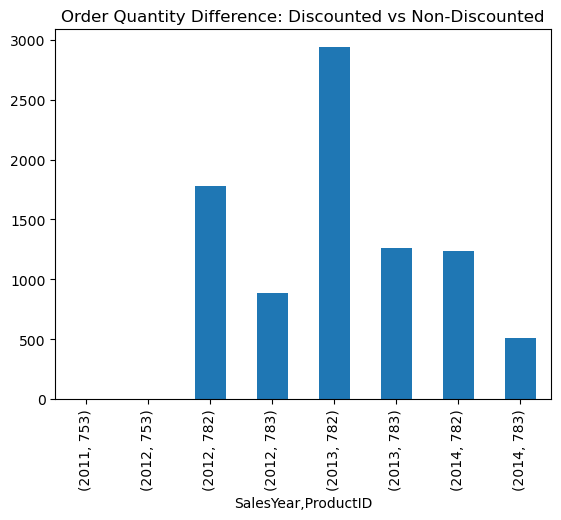

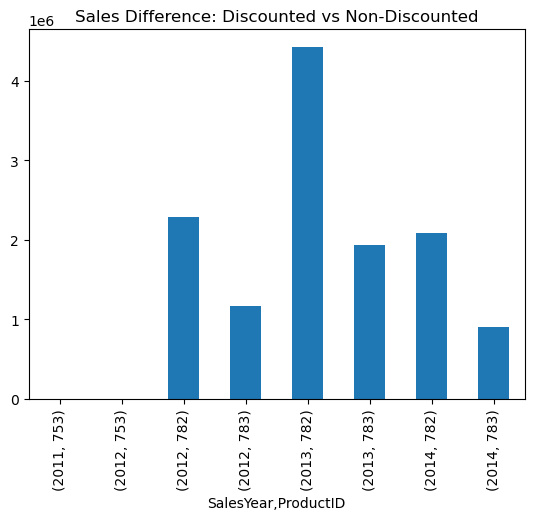

In [38]:
#  Visualizing the Results
# Visualizing the results using matplotlib showing the difference in sales quantities
# Total sales between discounted and non-discounted orders for each product and year.

import matplotlib.pyplot as plt

# Visualization of Order Quantity Difference
comparison_df['OrderQty_Difference'].plot(kind='bar', title='Order Quantity Difference: Discounted vs Non-Discounted')
plt.show()

# Visualization of Sales Difference
comparison_df['Sales_Difference'].plot(kind='bar', title='Sales Difference: Discounted vs Non-Discounted')
plt.show()


In [39]:
import pandas as pd
import scipy.stats as stats

In [57]:
# Define the SQL query as a multi-line string
sql_query = """
WITH DiscountedSales AS (
    SELECT 
        SOP.ProductID,
        YEAR(SOH.OrderDate) AS SalesYear,
        SO.DiscountPct,
        SUM(SOD.OrderQty) AS QuantitySold,
        SUM(SOD.LineTotal) AS TotalSales
    FROM 
        Sales.SpecialOfferProduct SOP
    INNER JOIN 
        Sales.SpecialOffer SO ON SOP.SpecialOfferID = SO.SpecialOfferID
    INNER JOIN 
        Sales.SalesOrderDetail SOD ON SOP.ProductID = SOD.ProductID AND SOP.SpecialOfferID = SOD.SpecialOfferID
    INNER JOIN 
        Sales.SalesOrderHeader SOH ON SOD.SalesOrderID = SOH.SalesOrderID
    WHERE 
        SO.DiscountPct > 0 AND
        SOP.ProductID IN (753, 783, 782)
    GROUP BY 
        SOP.ProductID, 
        YEAR(SOH.OrderDate),
        SO.DiscountPct
),
NonDiscountedSales AS (
    SELECT 
        SOP.ProductID,
        YEAR(SOH.OrderDate) AS SalesYear,
        SUM(SOD.OrderQty) AS QuantitySold,
        SUM(SOD.LineTotal) AS TotalSales
    FROM 
        Sales.SpecialOfferProduct SOP
    INNER JOIN 
        Sales.SalesOrderDetail SOD ON SOP.ProductID = SOD.ProductID
    INNER JOIN 
        Sales.SalesOrderHeader SOH ON SOD.SalesOrderID = SOH.SalesOrderID
    WHERE 
        SOP.ProductID IN (753, 783, 782) AND
        NOT EXISTS (
            SELECT 1
            FROM Sales.SpecialOffer SO
            WHERE SO.SpecialOfferID = SOD.SpecialOfferID AND SO.DiscountPct > 0
        )
    GROUP BY 
        SOP.ProductID, 
        YEAR(SOH.OrderDate)
)
SELECT 
    DS.ProductID,
    P.Name,
    DS.SalesYear,
    DS.DiscountPct,
    DS.QuantitySold AS DiscountedQuantitySold,
    DS.TotalSales AS DiscountedTotalSales,
    NDS.QuantitySold AS NonDiscountedQuantitySold,
    NDS.TotalSales AS NonDiscountedTotalSales
FROM 
    DiscountedSales DS
INNER JOIN 
    NonDiscountedSales NDS ON DS.ProductID = NDS.ProductID AND DS.SalesYear = NDS.SalesYear
INNER JOIN 
    Production.Product P ON DS.ProductID = P.ProductID
ORDER BY 
    DS.SalesYear, 
    DS.ProductID;
"""

# Use pandas to run the SQL query and return the results into a DataFrame
df = pd.read_sql_query(sql_query, engine)

# Display the first few rows of the DataFrame
df.head()


,ProductID,Name,SalesYear,DiscountPct,DiscountedQuantitySold,DiscountedTotalSales,NonDiscountedQuantitySold,NonDiscountedTotalSales
0,782,"Mountain-200 Black, 38",2012,0.02,28,32611.808880,3440,4.439166e+06
1,783,"Mountain-200 Black, 42",2012,0.02,23,26788.271580,2553,3.374865e+06
2,783,"Mountain-200 Black, 42",2012,0.05,15,16059.807000,2553,3.374865e+06
3,782,"Mountain-200 Black, 38",2013,0.02,47,61310.198852,5564,8.453169e+06
4,782,"Mountain-200 Black, 38",2013,0.05,32,38372.232800,5564,8.453169e+06


In [60]:
sql_query = """
SELECT 
    YEAR(SOH.OrderDate) AS SalesYear,
    SOD.ProductID,
    P.Name AS ProductName,
    PC.Name AS CategoryName,
    SUM(SOD.LineTotal) AS TotalSales
FROM 
    Sales.SalesOrderDetail SOD
JOIN 
    Sales.SalesOrderHeader SOH ON SOD.SalesOrderID = SOH.SalesOrderID
JOIN 
    Production.Product P ON SOD.ProductID = P.ProductID
JOIN 
    Production.ProductSubcategory PS ON P.ProductSubcategoryID = PS.ProductSubcategoryID
JOIN 
    Production.ProductCategory PC ON PS.ProductCategoryID = PC.ProductCategoryID
WHERE 
    SOD.ProductID IN (753, 783, 782)
GROUP BY 
    YEAR(SOH.OrderDate), 
    SOD.ProductID, 
    P.Name, 
    PC.Name
ORDER BY 
    SalesYear, 
    TotalSales DESC;
    
"""

# Use pandas to run the SQL query and return the results into a DataFrame
df = pd.read_sql_query(sql_query, engine)

# Display the first few rows of the DataFrame
df.head()


,SalesYear,ProductID,ProductName,CategoryName,TotalSales
0,2011,753,"Road-150 Red, 56",Bikes,1.018376e+06
1,2012,783,"Mountain-200 Black, 42",Bikes,1.167803e+06
2,2012,782,"Mountain-200 Black, 38",Bikes,1.142403e+06
3,2012,753,"Road-150 Red, 56",Bikes,8.294430e+05
4,2013,782,"Mountain-200 Black, 38",Bikes,2.212975e+06


In [61]:
sql_query = """
SELECT 
    YEAR(SOH.OrderDate) AS SalesYear,
    SOD.ProductID,
    P.Name,
    SOH.OrderDate,
    SO.DiscountPct,
    SUM(SOD.OrderQty) AS QuantitySold,
    SUM(SOD.LineTotal) AS TotalSales,
    SUM(SOD.LineTotal) - (SUM(SOD.LineTotal) * SO.DiscountPct) AS SalesAfterDiscount
FROM 
    Sales.SalesOrderDetail SOD
JOIN 
    Sales.SalesOrderHeader SOH ON SOD.SalesOrderID = SOH.SalesOrderID
JOIN 
    Production.Product P ON SOD.ProductID = P.ProductID
JOIN 
    Sales.SpecialOfferProduct SOP ON SOD.ProductID = SOP.ProductID
JOIN 
    Sales.SpecialOffer SO ON SOP.SpecialOfferID = SO.SpecialOfferID AND SOH.OrderDate BETWEEN SO.StartDate AND SO.EndDate
WHERE 
    (SOD.ProductID = 753 AND YEAR(SOH.OrderDate) = 2011) OR
    (SOD.ProductID = 783 AND YEAR(SOH.OrderDate) = 2012) OR
    (SOD.ProductID = 782 AND YEAR(SOH.OrderDate) = 2013) OR
    (SOD.ProductID = 782 AND YEAR(SOH.OrderDate) = 2014)
GROUP BY 
    YEAR(SOH.OrderDate), 
    SOD.ProductID, 
    P.Name,
    SOH.OrderDate,
    SO.DiscountPct
ORDER BY 
    SalesYear, 
    SOD.ProductID;
"""
# Use pandas to run the SQL query and return the results into a DataFrame
df = pd.read_sql_query(sql_query, engine)

# Display the first few rows of the DataFrame
df.head()

,SalesYear,ProductID,Name,OrderDate,DiscountPct,QuantitySold,TotalSales,SalesAfterDiscount
0,2011,753,"Road-150 Red, 56",2011-05-31,0.0,14,30057.468,30057.468
1,2011,753,"Road-150 Red, 56",2011-06-02,0.0,1,3578.270,3578.270
2,2011,753,"Road-150 Red, 56",2011-06-03,0.0,1,3578.270,3578.270
3,2011,753,"Road-150 Red, 56",2011-06-04,0.0,1,3578.270,3578.270
4,2011,753,"Road-150 Red, 56",2011-06-08,0.0,1,3578.270,3578.270


In [69]:
sql_query = """
SELECT 
    YEAR(SOH.OrderDate) AS SalesYear,
    SOD.ProductID,
    SUM(CASE WHEN SO.DiscountPct > 0 THEN SOD.OrderQty ELSE 0 END) AS DiscountedQuantitySold,
    SUM(CASE WHEN SO.DiscountPct > 0 THEN SOD.LineTotal ELSE 0 END) AS DiscountedTotalSales,
    SUM(CASE WHEN SO.DiscountPct = 0 OR SO.DiscountPct IS NULL THEN SOD.OrderQty ELSE 0 END) AS NonDiscountedQuantitySold,
    SUM(CASE WHEN SO.DiscountPct = 0 OR SO.DiscountPct IS NULL THEN SOD.LineTotal ELSE 0 END) AS NonDiscountedTotalSales
FROM 
    Sales.SalesOrderDetail SOD
INNER JOIN 
    Sales.SalesOrderHeader SOH ON SOD.SalesOrderID = SOH.SalesOrderID
LEFT JOIN 
    Sales.SpecialOfferProduct SOP ON SOD.ProductID = SOP.ProductID
LEFT JOIN 
    Sales.SpecialOffer SO ON SOP.SpecialOfferID = SO.SpecialOfferID
WHERE 
    SOD.ProductID IN (753, 783, 782)
GROUP BY 
    YEAR(SOH.OrderDate), 
    SOD.ProductID
    """
# Use pandas to run the SQL query and return the results into a DataFrame
df = pd.read_sql_query(sql_query, engine)

# Display the first few rows of the DataFrame
df.head()


,SalesYear,ProductID,DiscountedQuantitySold,DiscountedTotalSales,NonDiscountedQuantitySold,NonDiscountedTotalSales
0,2011,753,0,0.000000e+00,363,1.018376e+06
1,2012,783,1778,2.335606e+06,889,1.167803e+06
2,2013,782,4410,6.638924e+06,1470,2.212975e+06
3,2014,783,1026,1.818607e+06,513,9.093035e+05
4,2013,783,2524,3.864777e+06,1262,1.932388e+06


In [73]:
query = """
WITH DiscountedSales AS (
    SELECT 
        P.ProductID,
        YEAR(SOH.OrderDate) AS SalesYear,
        SUM(SOD.OrderQty) AS DiscountedQuantitySold,
        SUM(SOD.LineTotal) AS DiscountedTotalSales
    FROM 
        Sales.SalesOrderDetail SOD
    INNER JOIN 
        Sales.SalesOrderHeader SOH ON SOD.SalesOrderID = SOH.SalesOrderID
    INNER JOIN 
        Production.Product P ON SOD.ProductID = P.ProductID
    INNER JOIN 
        Production.ProductSubcategory PS ON P.ProductSubcategoryID = PS.ProductSubcategoryID
    INNER JOIN 
        Production.ProductCategory PC ON PS.ProductCategoryID = PC.ProductCategoryID
    INNER JOIN 
        Sales.SpecialOfferProduct SOP ON SOD.SalesOrderID = SOP.SalesOrderID
    INNER JOIN 
        Sales.SpecialOffer SO ON SOP.SpecialOfferID = SO.SpecialOfferID
    WHERE 
        PC.Name = 'Bikes' AND SO.DiscountPct > 0
    GROUP BY 
        P.ProductID, 
        YEAR(SOH.OrderDate)
),
NonDiscountedSales AS (
    SELECT 
        P.ProductID,
        YEAR(SOH.OrderDate) AS SalesYear,
        SUM(SOD.OrderQty) AS NonDiscountedQuantitySold,
        SUM(SOD.LineTotal) AS NonDiscountedTotalSales
    FROM 
        Sales.SalesOrderDetail SOD
    INNER JOIN 
        Sales.SalesOrderHeader SOH ON SOD.SalesOrderID = SOH.SalesOrderID
    INNER JOIN 
        Production.Product P ON SOD.ProductID = P.ProductID
    INNER JOIN 
        Production.ProductSubcategory PS ON P.ProductSubcategoryID = PS.ProductSubcategoryID
    INNER JOIN 
        Production.ProductCategory PC ON PS.ProductCategoryID = PC.ProductCategoryID
    WHERE 
        PC.Name = 'Bikes' AND NOT EXISTS (
            SELECT 1 FROM Sales.SpecialOfferProduct WHERE SalesOrderID = SOD.SalesOrderID AND DiscountPct > 0
        )
    GROUP BY 
        P.ProductID, 
        YEAR(SOH.OrderDate)
)
SELECT 
    DS.ProductID,
    DS.SalesYear,
    DS.DiscountedQuantitySold,
    DS.DiscountedTotalSales,
    NDS.NonDiscountedQuantitySold,
    NDS.NonDiscountedTotalSales
FROM 
    DiscountedSales DS
FULL OUTER JOIN 
    NonDiscountedSales NDS ON DS.ProductID = NDS.ProductID AND DS.SalesYear = NDS.SalesYear
ORDER BY 
    DS.SalesYear, 
    DS.ProductID;
"""

# Use pandas to run the SQL query and return the results into a DataFrame
df = pd.read_sql_query(sql_query, engine)

# Display the first few rows of the DataFrame
df.head()


,ProductID,SalesYear,DiscountPct,DiscountedQuantitySold,DiscountedTotalSales,NonDiscountedQuantitySold,NonDiscountedTotalSales
0,753,2011,0.00,0,0.000000e+00,363,1.018376e+06
1,753,2012,0.00,0,0.000000e+00,301,8.294430e+05
2,782,2012,0.02,888,1.142403e+06,860,1.109792e+06
3,782,2012,0.05,888,1.142403e+06,860,1.109792e+06
4,782,2012,0.40,888,1.142403e+06,860,1.109792e+06


In [75]:
query = """
WITH BikeSales AS (
    SELECT 
        P.ProductID,
        P.Name AS ProductName,
        YEAR(SOH.OrderDate) AS SalesYear,
        SUM(CASE WHEN SO.DiscountPct > 0 THEN SOD.OrderQty ELSE 0 END) AS DiscountedQuantitySold,
        SUM(CASE WHEN SO.DiscountPct > 0 THEN SOD.LineTotal ELSE 0 END) AS DiscountedTotalSales,
        SUM(CASE WHEN SO.DiscountPct = 0 OR SO.DiscountPct IS NULL THEN SOD.OrderQty ELSE 0 END) AS NonDiscountedQuantitySold,
        SUM(CASE WHEN SO.DiscountPct = 0 OR SO.DiscountPct IS NULL THEN SOD.LineTotal ELSE 0 END) AS NonDiscountedTotalSales
    FROM 
        Sales.SalesOrderDetail SOD
    INNER JOIN 
        Sales.SalesOrderHeader SOH ON SOD.SalesOrderID = SOH.SalesOrderID
    INNER JOIN 
        Production.Product P ON SOD.ProductID = P.ProductID
    INNER JOIN 
        Production.ProductSubcategory PS ON P.ProductSubcategoryID = PS.ProductSubcategoryID
    INNER JOIN 
        Production.ProductCategory PC ON PS.ProductCategoryID = PC.ProductCategoryID
    LEFT JOIN 
        Sales.SpecialOfferProduct SOP ON SOD.ProductID = SOP.ProductID
    LEFT JOIN 
        Sales.SpecialOffer SO ON SOP.SpecialOfferID = SO.SpecialOfferID AND SOH.OrderDate BETWEEN SO.StartDate AND SO.EndDate
    WHERE 
        PC.Name = 'Bikes'
    GROUP BY 
        P.ProductID, P.Name, YEAR(SOH.OrderDate)
)
SELECT * FROM BikeSales
ORDER BY SalesYear, ProductID;
"""

df_bikes = pd.read_sql_query(query, engine)


In [76]:
print(df_bikes.shape)
print(df_bikes.head())


(227, 7)
   ProductID       ProductName  SalesYear  DiscountedQuantitySold  \
0        749  Road-150 Red, 62       2011                       0   
1        750  Road-150 Red, 44       2011                       0   
2        751  Road-150 Red, 48       2011                       0   
3        752  Road-150 Red, 52       2011                       0   
4        753  Road-150 Red, 56       2011                       0   

   DiscountedTotalSales  NonDiscountedQuantitySold  NonDiscountedTotalSales  
0                   0.0                        320               968995.516  
1                   0.0                        217               690606.110  
2                   0.0                        237               765034.126  
3                   0.0                        216               685596.532  
4                   0.0                        363              1018375.642  


In [77]:
# Display the first few rows of the DataFrame
print(df_bikes.head())

# Get a summary of the DataFrame
print(df_bikes.describe())


   ProductID       ProductName  SalesYear  DiscountedQuantitySold  \
0        749  Road-150 Red, 62       2011                       0   
1        750  Road-150 Red, 44       2011                       0   
2        751  Road-150 Red, 48       2011                       0   
3        752  Road-150 Red, 52       2011                       0   
4        753  Road-150 Red, 56       2011                       0   

   DiscountedTotalSales  NonDiscountedQuantitySold  NonDiscountedTotalSales  
0                   0.0                        320               968995.516  
1                   0.0                        217               690606.110  
2                   0.0                        237               765034.126  
3                   0.0                        216               685596.532  
4                   0.0                        363              1018375.642  
        ProductID    SalesYear  DiscountedQuantitySold  DiscountedTotalSales  \
count  227.000000   227.000000       

In [78]:
# Calculate the differences
df_bikes['QuantityDifference'] = df_bikes['DiscountedQuantitySold'] - df_bikes['NonDiscountedQuantitySold']
df_bikes['SalesDifference'] = df_bikes['DiscountedTotalSales'] - df_bikes['NonDiscountedTotalSales']


In [79]:
# Calculate the differences
df_bikes['QuantityDifference'] = df_bikes['DiscountedQuantitySold'] - df_bikes['NonDiscountedQuantitySold']
df_bikes['SalesDifference'] = df_bikes['DiscountedTotalSales'] - df_bikes['NonDiscountedTotalSales']

# Display the first few rows of the updated DataFrame
print(df_bikes.head())


   ProductID       ProductName  SalesYear  DiscountedQuantitySold  \
0        749  Road-150 Red, 62       2011                       0   
1        750  Road-150 Red, 44       2011                       0   
2        751  Road-150 Red, 48       2011                       0   
3        752  Road-150 Red, 52       2011                       0   
4        753  Road-150 Red, 56       2011                       0   

   DiscountedTotalSales  NonDiscountedQuantitySold  NonDiscountedTotalSales  \
0                   0.0                        320               968995.516   
1                   0.0                        217               690606.110   
2                   0.0                        237               765034.126   
3                   0.0                        216               685596.532   
4                   0.0                        363              1018375.642   

   QuantityDifference  SalesDifference  
0                -320      -968995.516  
1                -217      -

In [80]:
# Display specific columns
print(df_bikes[['ProductID', 'SalesYear', 'QuantityDifference', 'SalesDifference']].head())


   ProductID  SalesYear  QuantityDifference  SalesDifference
0        749       2011                -320      -968995.516
1        750       2011                -217      -690606.110
2        751       2011                -237      -765034.126
3        752       2011                -216      -685596.532
4        753       2011                -363     -1018375.642


In [81]:
# Group by ProductID and SalesYear and calculate average differences
average_differences = df_bikes.groupby(['ProductID', 'SalesYear']).agg({
    'QuantityDifference': 'mean',
    'SalesDifference': 'mean'
}).reset_index()

print(average_differences.head())


   ProductID  SalesYear  QuantityDifference  SalesDifference
0        749       2011              -320.0      -968995.516
1        749       2012              -280.0      -800101.172
2        750       2011              -217.0      -690606.110
3        750       2012              -220.0      -649813.832
4        751       2011              -237.0      -765034.126


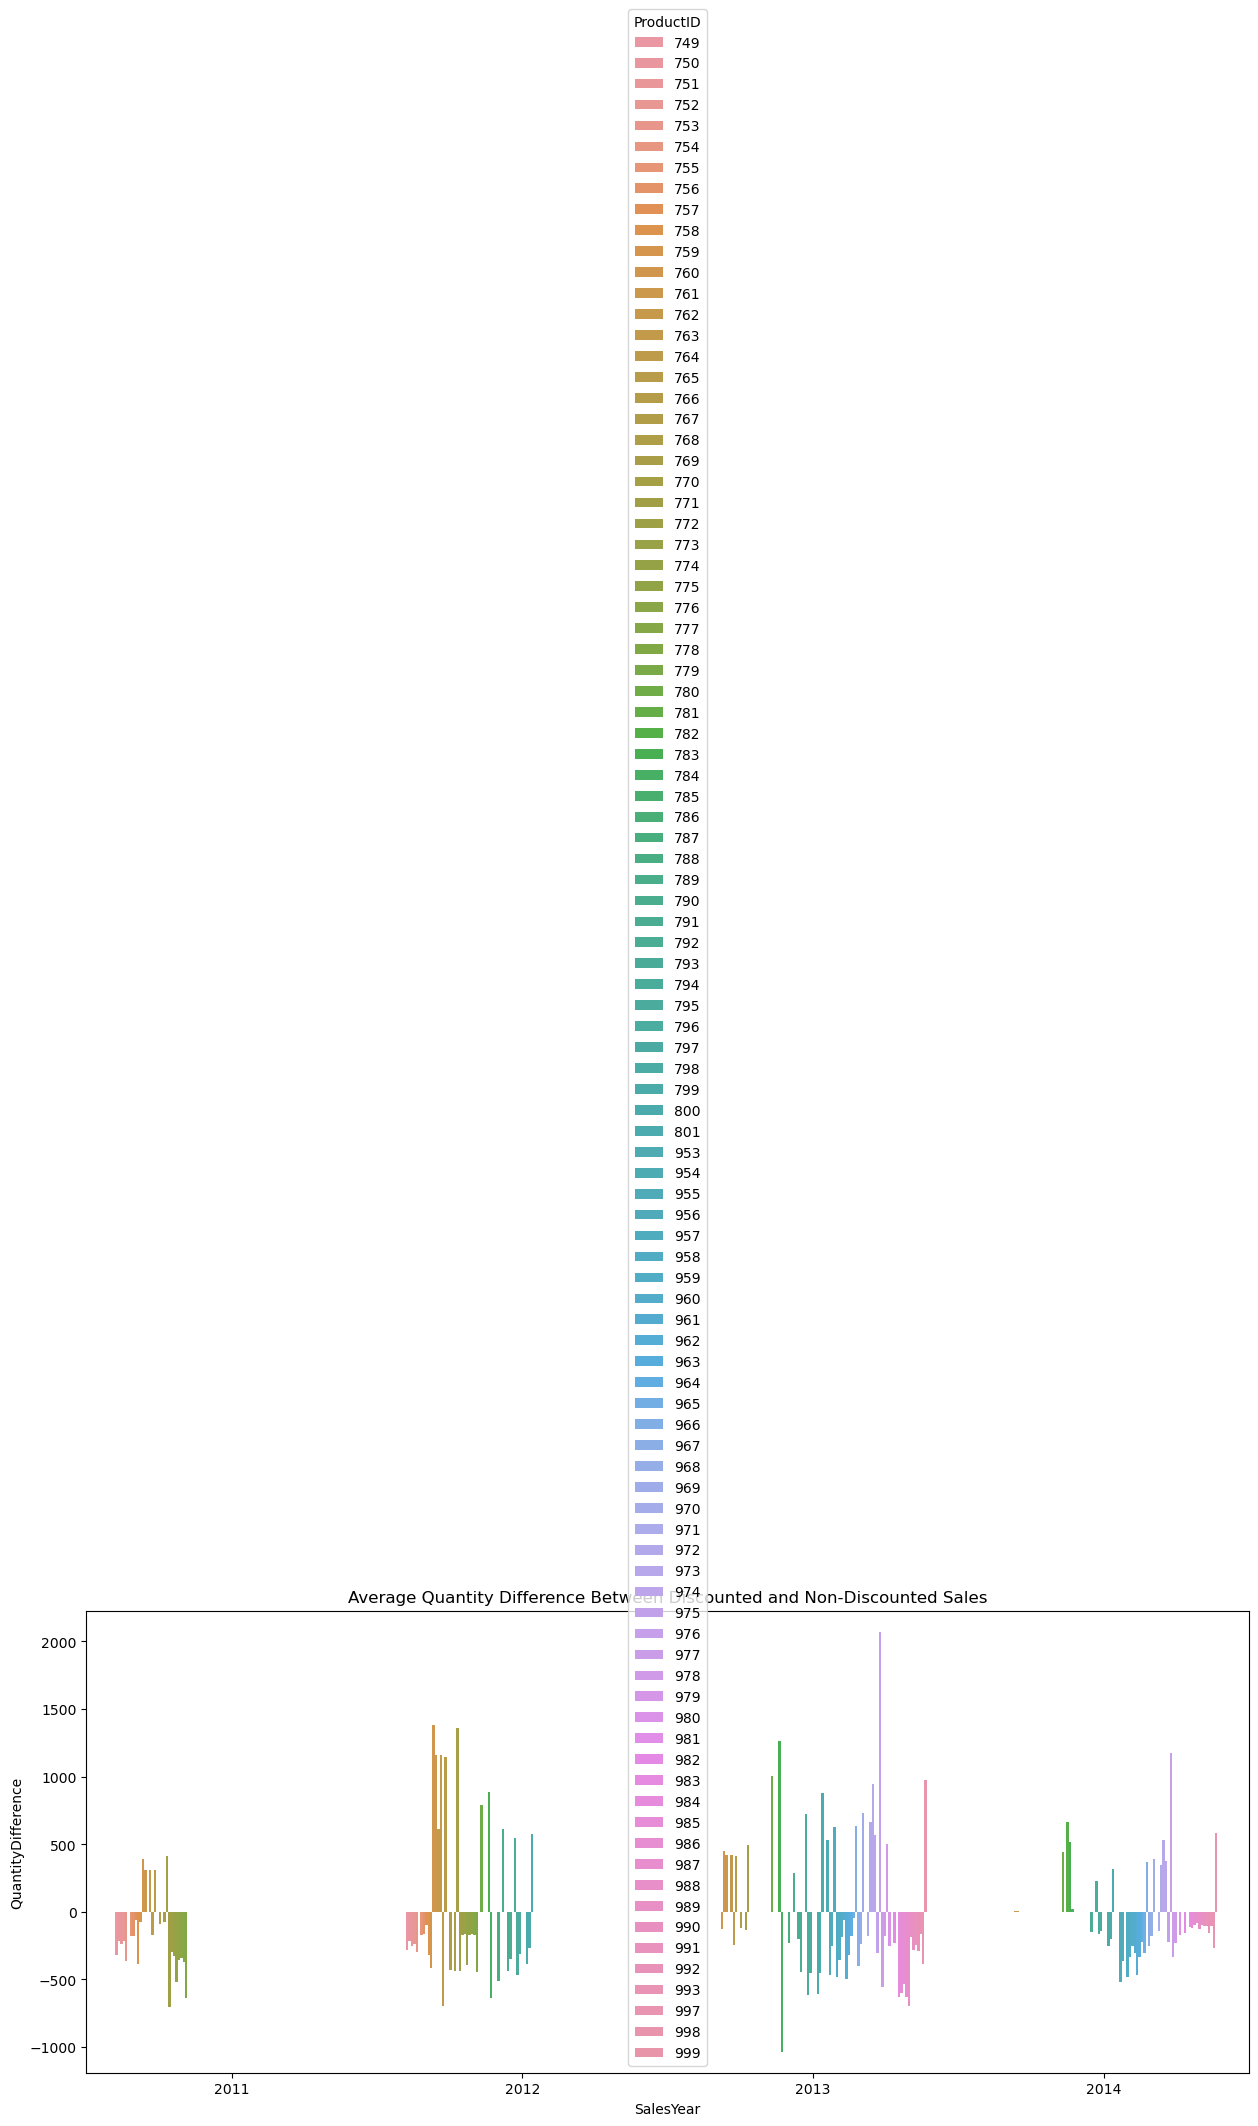

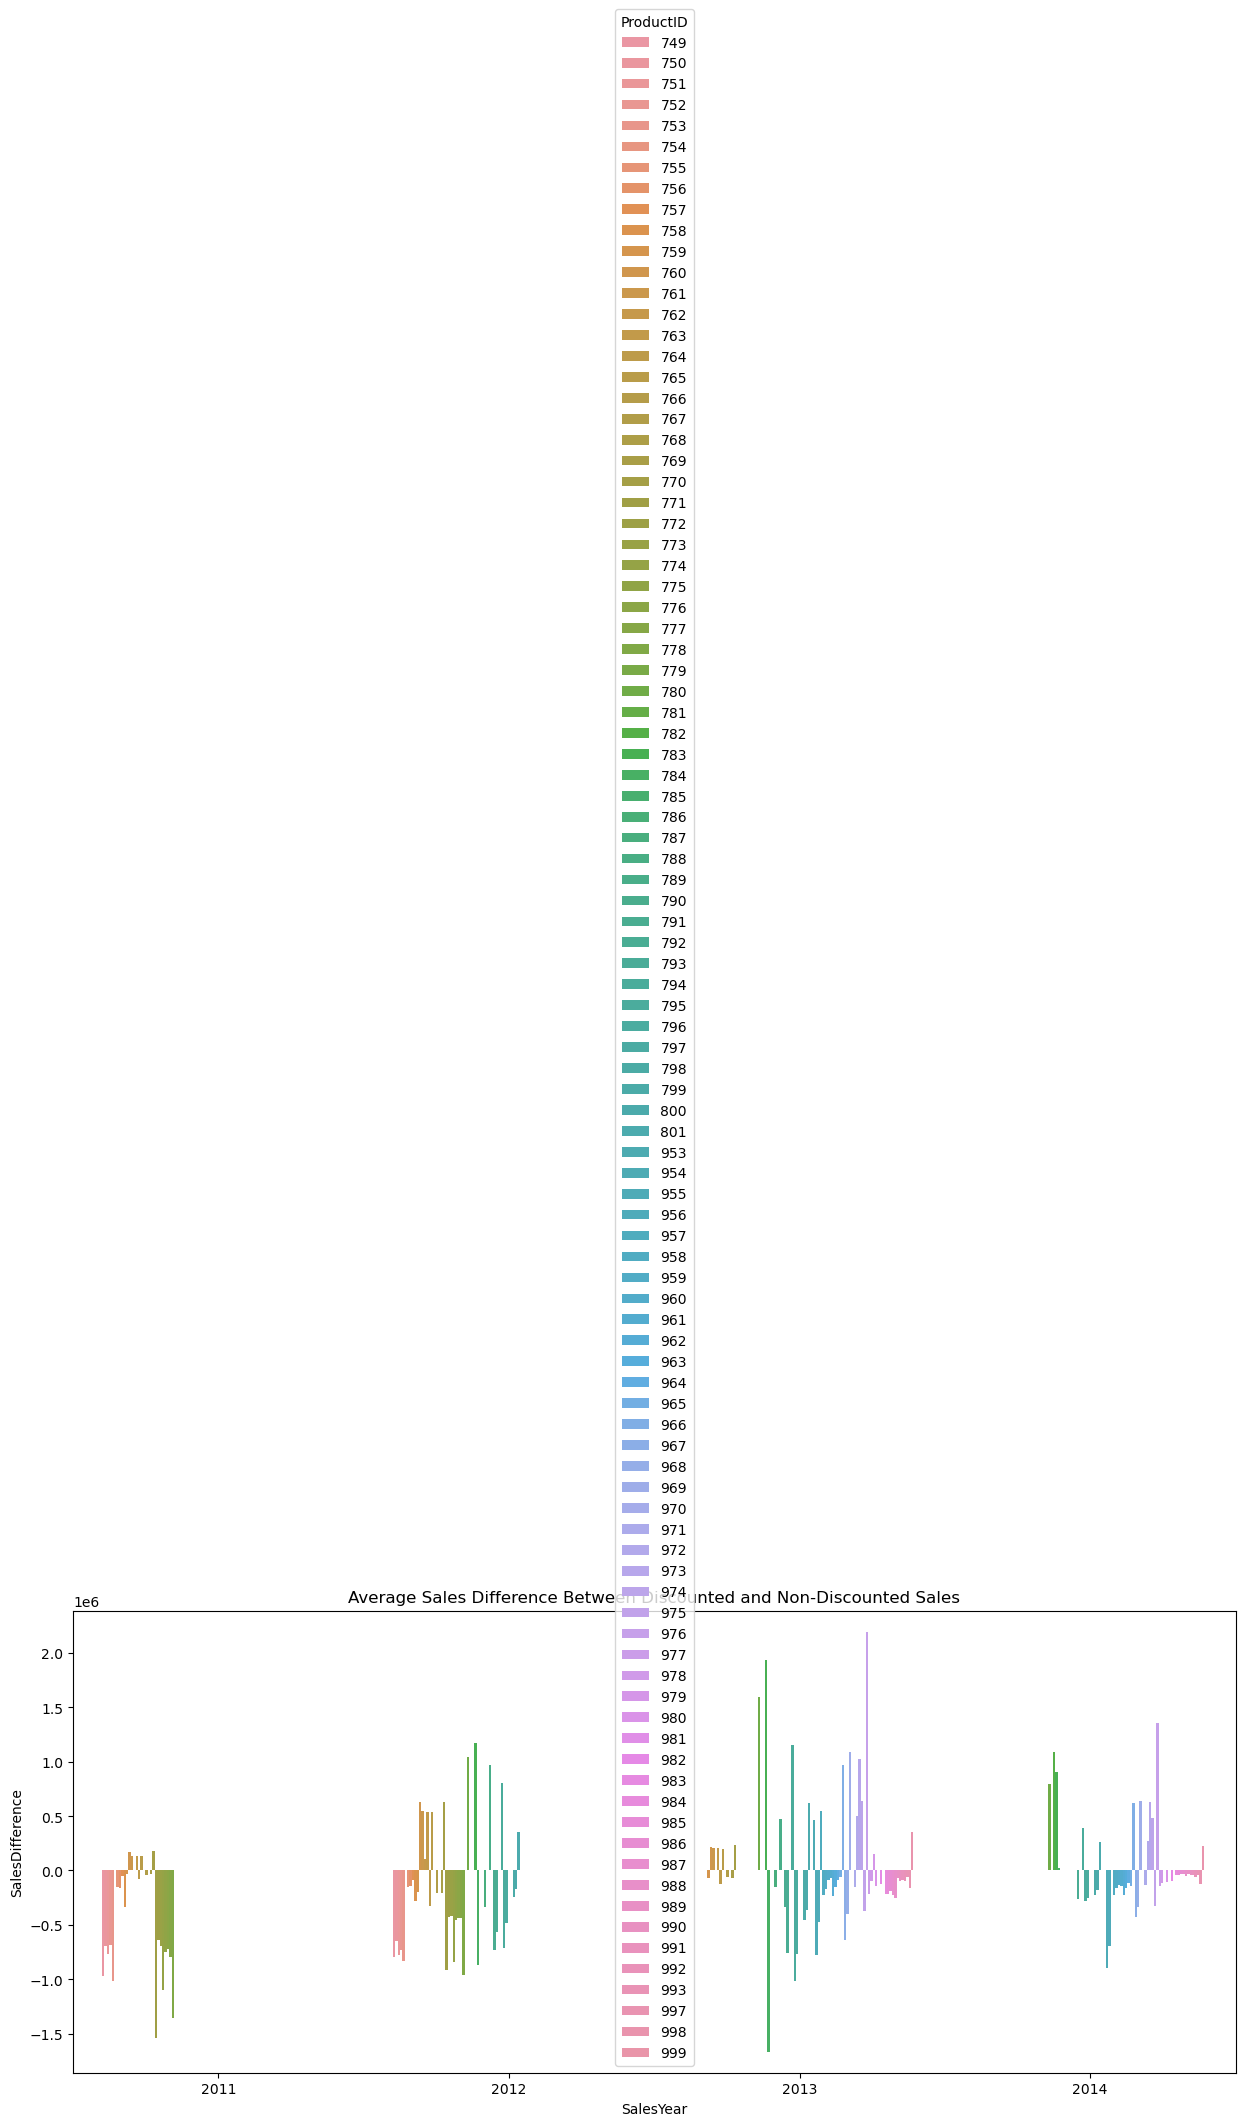

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the Quantity Difference
plt.figure(figsize=(15, 6))
sns.barplot(x='SalesYear', y='QuantityDifference', hue='ProductID', data=average_differences)
plt.title('Average Quantity Difference Between Discounted and Non-Discounted Sales')
plt.show()

# Visualize the Sales Difference
plt.figure(figsize=(15, 6))
sns.barplot(x='SalesYear', y='SalesDifference', hue='ProductID', data=average_differences)
plt.title('Average Sales Difference Between Discounted and Non-Discounted Sales')
plt.show()


In [92]:

category_sales = df_bikes.groupby('SalesYear').agg({
    'DiscountedQuantitySold': 'sum',
    'NonDiscountedQuantitySold': 'sum',
    'DiscountedTotalSales': 'sum',
    'NonDiscountedTotalSales': 'sum'
}).reset_index()

# print the aggregated DataFrame
print(category_sales)


   SalesYear  DiscountedQuantitySold  NonDiscountedQuantitySold  \
0       2011                    6600                      10979   
1       2012                   33577                      32874   
2       2013                   45493                      45439   
3       2014                   18490                      20110   

   DiscountedTotalSales  NonDiscountedTotalSales  
0          5.847139e+06             1.771266e+07  
1          2.822401e+07             3.530845e+07  
2          4.645133e+07             4.368202e+07  
3          2.282675e+07             2.149695e+07  


In [93]:
category_sales['QuantityDifference'] = category_sales['DiscountedQuantitySold'] - category_sales['NonDiscountedQuantitySold']
category_sales['SalesDifference'] = category_sales['DiscountedTotalSales'] - category_sales['NonDiscountedTotalSales']


In [95]:

category_sales['QuantityDifference'] = category_sales['DiscountedQuantitySold'] - category_sales['NonDiscountedQuantitySold']
category_sales['SalesDifference'] = category_sales['DiscountedTotalSales'] - category_sales['NonDiscountedTotalSales']

# Display the DataFrame with the new columns
category_sales


,SalesYear,DiscountedQuantitySold,NonDiscountedQuantitySold,DiscountedTotalSales,NonDiscountedTotalSales,QuantityDifference,SalesDifference
0,2011,6600,10979,5.847139e+06,1.771266e+07,-4379,-1.186552e+07
1,2012,33577,32874,2.822401e+07,3.530845e+07,703,-7.084443e+06
2,2013,45493,45439,4.645133e+07,4.368202e+07,54,2.769309e+06
3,2014,18490,20110,2.282675e+07,2.149695e+07,-1620,1.329801e+06


In [96]:
from scipy import stats

# Perform a paired t-test for the same number of discounted and non-discounted sales entries

t_stat, p_value = stats.ttest_rel(
    category_sales['DiscountedTotalSales'],
    category_sales['NonDiscountedTotalSales']
)

print(f"Paired T-statistic: {t_stat}, P-value: {p_value}")


Paired T-statistic: -1.0670347994593568, P-value: 0.3642017359788525


In [101]:
import pandas as pd
from sqlalchemy import create_engine
from scipy import stats
import numpy as np


In [109]:
engine = new_engine('mssql', 'LAPTOP-HT00GPQN', 'AdventureWorks2022', integrated_security=True)

mssql://LAPTOP-HT00GPQN/AdventureWorks2022?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server


In [112]:
query = """
SELECT SOH.SalesOrderID, 
       SUM(SOD.LineTotal) AS TotalSales
FROM Sales.SalesOrderDetail SOD
JOIN Sales.SalesOrderHeader SOH ON SOD.SalesOrderID = SOH.SalesOrderID
JOIN Production.Product P ON SOD.ProductID = P.ProductID
JOIN Production.ProductSubcategory PS ON P.ProductSubcategoryID = PS.ProductSubcategoryID
JOIN Production.ProductCategory PC ON PS.ProductCategoryID = PC.ProductCategoryID
WHERE PC.Name = 'Bikes'
GROUP BY SOH.SalesOrderID
"""
df_sales = pd.read_sql_query(query, engine)
print(df_sales.head())


   SalesOrderID  TotalSales
0         43697   3578.2700
1         43698   3399.9900
2         43699   3399.9900
3         43700    699.0982
4         43701   3399.9900


In [113]:
confidence_level = 0.95
degrees_freedom = len(df_sales) - 1
mean_sales = np.mean(df_sales['TotalSales'])
standard_error = stats.sem(df_sales['TotalSales'])

confidence_interval = stats.t.interval(confidence_level, degrees_freedom, mean_sales, standard_error)


In [114]:
print("Confidence Interval for the average total sales per order in the 'Bikes' category:", confidence_interval)


Confidence Interval for the average total sales per order in the 'Bikes' category: (4985.197458029547, 5320.897130900222)


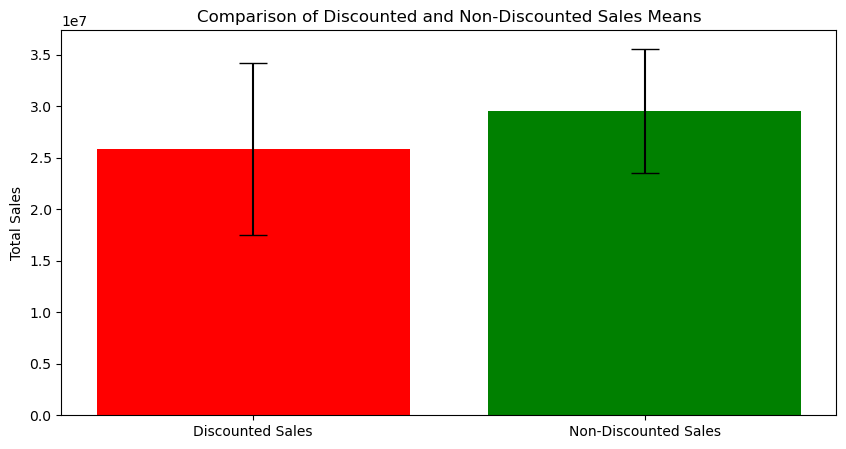

In [127]:

discounted_mean = np.mean(category_sales['DiscountedTotalSales'])
non_discounted_mean = np.mean(category_sales['NonDiscountedTotalSales'])

# Calculate the standard errors for both means
discounted_se = stats.sem(category_sales['DiscountedTotalSales'])
non_discounted_se = stats.sem(category_sales['NonDiscountedTotalSales'])

# Define the positions of the bars
bar_positions = np.arange(2)

# Define the plot
plt.figure(figsize=(10, 5))

# Plot the means
plt.bar(bar_positions, [discounted_mean, non_discounted_mean], color=['red', 'green'], yerr=[discounted_se, non_discounted_se], capsize=10)

# Set the position and labels for the x-ticks
plt.xticks(bar_positions, ['Discounted Sales', 'Non-Discounted Sales'])

# Set plot title and labels
plt.title('Comparison of Discounted and Non-Discounted Sales Means')
plt.ylabel('Total Sales')

# Show the plot
plt.show()


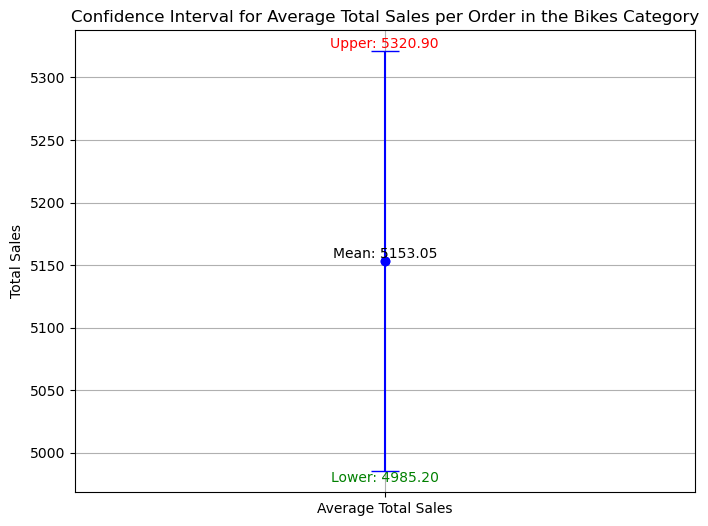

In [135]:
import matplotlib.pyplot as plt
import numpy as np

# mean_sales, standard_error, and confidence_interval are already calculated and available
mean_sales = 5153.047294464885 
confidence_interval = (4985.197458029547, 5320.897130900222) 

# Define the plot
plt.figure(figsize=(8, 6))

# Plot the mean as a point
plt.plot(['Average Total Sales'], mean_sales, 'o', color='blue')

# Draw a line for the interval
plt.errorbar(['Average Total Sales'], mean_sales, yerr=[[mean_sales - confidence_interval[0]], [confidence_interval[1] - mean_sales]], fmt='o', color='blue', capsize=10)

# Set plot title and labels
plt.title('Confidence Interval for Average Total Sales per Order in the Bikes Category')
plt.ylabel('Total Sales')

# Display the actual values of mean and confidence interval for clarity
plt.text(0, mean_sales, f'Mean: {mean_sales:.2f}', ha='center', va='bottom')
plt.text(0, confidence_interval[0], f'Lower: {confidence_interval[0]:.2f}', ha='center', va='top', color='green')
plt.text(0, confidence_interval[1], f'Upper: {confidence_interval[1]:.2f}', ha='center', va='bottom', color='red')

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()
